# Benchmark Notebook

This notebook is used to benchmark the existing pipeline for feature selection using multiple benchmark datasets

In [1]:
from sklearn.datasets import load_breast_cancer

benchmark_breast_cancer_X, benchmark_breast_cancer_y = load_breast_cancer(as_frame=True, return_X_y=True)

benchmark_breast_cancer_X.shape, benchmark_breast_cancer_y.shape

((569, 30), (569,))

In [2]:
from sklearn.datasets import make_regression

benchmark_regression_X, benchmark_regression_y = make_regression(n_samples=1000, n_features=1000, n_informative=10, random_state=0)

# turn X and Y into dataframes

import pandas as pd

benchmark_regression_X = pd.DataFrame(benchmark_regression_X)

# turn to pd.series

benchmark_regression_y = pd.Series(benchmark_regression_y)





In [3]:
# turn columns into strings

benchmark_regression_X.columns = [str(i) for i in range(benchmark_regression_X.shape[1])]

benchmark_regression_X.head()

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,-1.084765,1.237148,0.130101,0.154898,-0.676024,-0.081947,0.641238,-0.154788,0.765215,-0.606001,...,-0.870153,1.194708,0.722042,-0.795280,-0.023182,-1.350349,-0.223828,0.510706,2.040819,0.941756
1,0.593602,0.486436,-0.325602,0.153472,-0.685815,0.490864,0.335730,-0.124691,-1.610125,-0.275904,...,-0.731246,-0.768045,0.236065,0.856283,-2.426735,-0.016661,-0.314094,1.894548,-0.800644,0.260231
2,0.506191,-1.735148,-2.781958,0.149985,0.116998,0.963722,-0.651163,-0.050181,0.458096,-0.026627,...,0.563683,-0.342342,-0.789264,0.304380,0.543953,1.375889,0.149494,-0.770951,0.333372,0.292224
3,-0.891875,-0.529014,-2.173289,0.312993,0.244659,-0.342185,0.360855,-1.891031,1.153390,1.866242,...,-0.483675,-0.083471,1.354622,0.565601,0.745887,1.329062,-1.343778,-0.043938,1.039362,1.638842
4,0.757861,0.372349,-1.505053,1.187030,0.158975,-0.384438,0.271868,-1.531922,2.476336,1.560857,...,-0.906083,-2.311178,0.506005,-1.466585,1.776045,-0.406498,0.520906,1.568772,-0.318681,1.505933


In [4]:
benchmark_regression_y.head()

0   -174.503553
1     44.361147
2    -34.902099
3    106.707707
4    -18.504495
dtype: float64

In [2]:
## Import all the models

from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge, Lasso, ElasticNet, LassoCV, RidgeCV, ElasticNetCV

from sklearn.svm import SVC, SVR, LinearSVC, LinearSVR

from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor

from sklearn.ensemble import AdaBoostClassifier, AdaBoostRegressor

from sklearn.ensemble import ExtraTreesClassifier, ExtraTreesRegressor

from sklearn.ensemble import BaggingClassifier, BaggingRegressor

from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor

from sklearn.neural_network import MLPClassifier, MLPRegressor



## Simple Train Test Split

In [40]:
# perform a simple train test split fitting 

from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error
from scipy.stats import pearsonr
import pandas as pd
from sklearn.model_selection import train_test_split

n_samples = 1000
n_features = 1000
n_informative = 10
random_state = 0
model = ElasticNet()

benchmark_regression_X, benchmark_regression_y = make_regression(n_samples=n_samples, 
                                                                 n_features=n_features, 
                                                                 n_informative=n_informative, 
                                                                 random_state=random_state)

# turn X and Y into dataframes
X = pd.DataFrame(benchmark_regression_X)
y = pd.Series(benchmark_regression_y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# calculate the error

mse = mean_squared_error(y_test, y_pred)

# pearson correlation coefficient and p-value
corr, pval = pearsonr(y_test, y_pred)

print(f'MSE = {mse:.4f}, Correlation = {corr:.4f}, p-value = {pval:.4f}')



MSE = 13530.9535, Correlation = 0.8837, p-value = 0.0000


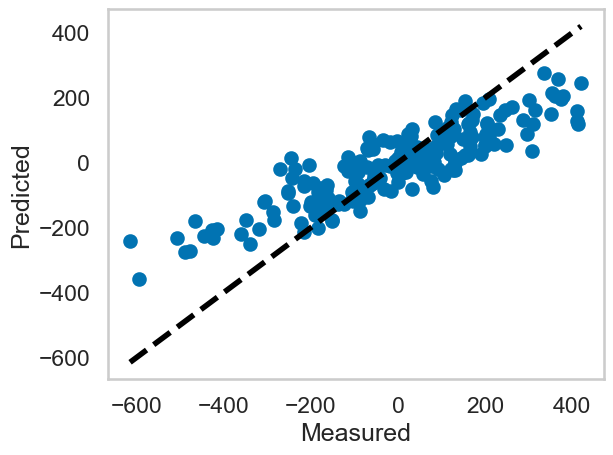

In [41]:
## plot y_test vs y_pred

import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
# plot a line y=x

plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.grid()
plt.show()

## Making a function

In [3]:
# perform a simple train test split fitting 

from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error
from scipy.stats import pearsonr
import pandas as pd
from sklearn.model_selection import train_test_split

n_samples = 1000
n_features = 1000
n_informative = 10
random_state = 0
model = ElasticNet()


def evaluate_make_regression(model, n_samples=1000, n_features=1000, n_informative=10, random_state=0):

    benchmark_regression_X, benchmark_regression_y = make_regression(n_samples=n_samples, 
                                                                    n_features=n_features, 
                                                                    n_informative=n_informative, 
                                                                    random_state=random_state)

    # turn X and Y into dataframes
    X = pd.DataFrame(benchmark_regression_X)
    y = pd.Series(benchmark_regression_y)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)

    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    # calculate the error

    mse = mean_squared_error(y_test, y_pred)

    # pearson correlation coefficient and p-value
    corr, pval = pearsonr(y_test, y_pred)

    # print(f'MSE = {mse:.4f}, Correlation = {corr:.4f}, p-value = {pval:.4f}')

    return mse, corr, pval, y_test, y_pred

## plot y_test vs y_pred

import matplotlib.pyplot as plt


def plot_make_regression(y_test, y_pred):
    plt.scatter(y_test, y_pred)
    # plot a line y=x

    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
    plt.xlabel('Measured')
    plt.ylabel('Predicted')
    plt.grid()
    plt.show()

## Benchmarking (1000, 10000, 10)

MSE = 35499.4834, Correlation = 0.5530, p-value = 0.0000


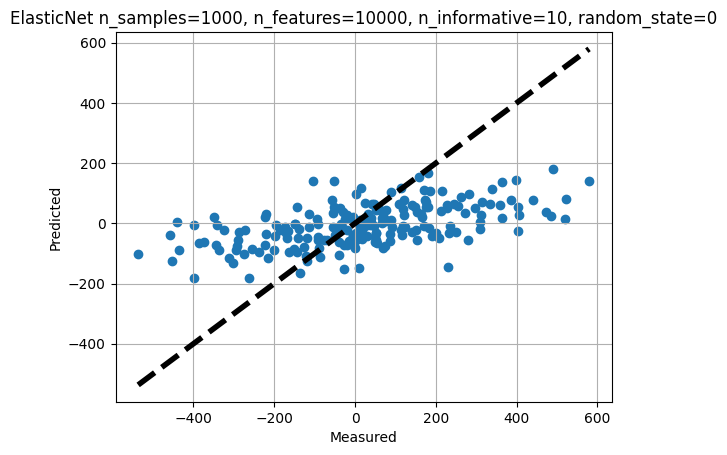

In [15]:
n_samples = 1000
n_features = 10000
n_informative = 10
random_state = 0
model = ElasticNet()

mse, corr, pval, y_test, y_pred = evaluate_make_regression(model, 
                                                           n_samples=n_samples, 
                                                           n_features=n_features, 
                                                           n_informative=n_informative, 
                                                           random_state=0)

print(f'MSE = {mse:.4f}, Correlation = {corr:.4f}, p-value = {pval:.4f}')

plt.title(f'{model.__class__.__name__} n_samples={n_samples}, n_features={n_features}, n_informative={n_informative}, random_state={random_state}')
plot_make_regression(y_test, y_pred)

## Even smaller sample size

MSE = 49591.6623, Correlation = 0.1404, p-value = 0.5548


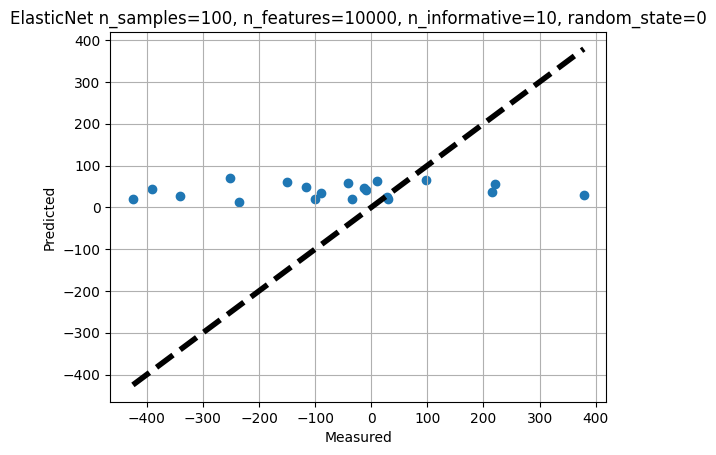

In [17]:
n_samples = 100
n_features = 10000
n_informative = 10
random_state = 0
model = ElasticNet(max_iter=10000)

mse, corr, pval, y_test, y_pred = evaluate_make_regression(model, 
                                                           n_samples=n_samples, 
                                                           n_features=n_features, 
                                                           n_informative=n_informative, 
                                                           random_state=0)

print(f'MSE = {mse:.4f}, Correlation = {corr:.4f}, p-value = {pval:.4f}')

plt.title(f'{model.__class__.__name__} n_samples={n_samples}, n_features={n_features}, n_informative={n_informative}, random_state={random_state}')
plot_make_regression(y_test, y_pred)

## Using f-regression feature selection

MSE = 37948.0801, Correlation = 0.4636, p-value = 0.0000


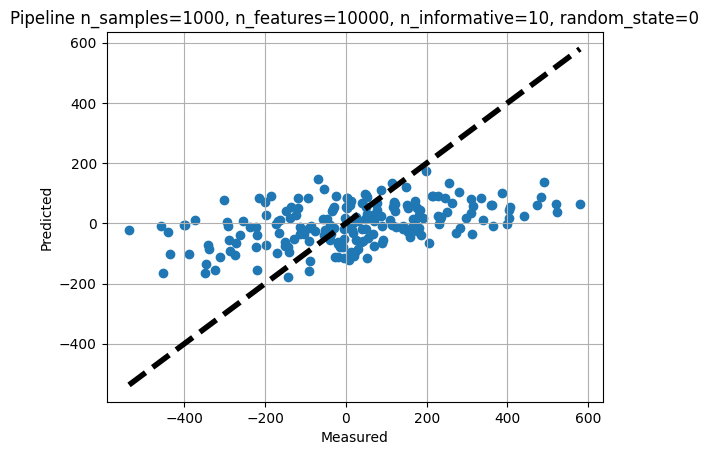

In [25]:
n_samples = 1000
n_features = 10000
n_informative = 10
random_state = 0
# import pipeline, scaler and f-regression, select k best 
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import f_regression, SelectKBest

# create a pipeline

model = Pipeline([('scaler', StandardScaler()),
                    ('select', SelectKBest(f_regression, k=1)),
                    ('model', ElasticNet(max_iter=10000))])

mse, corr, pval, y_test, y_pred = evaluate_make_regression(model, 
                                                           n_samples=n_samples, 
                                                           n_features=n_features, 
                                                           n_informative=n_informative, 
                                                           random_state=0)

print(f'MSE = {mse:.4f}, Correlation = {corr:.4f}, p-value = {pval:.4f}')

plt.title(f'{model.__class__.__name__} n_samples={n_samples}, n_features={n_features}, n_informative={n_informative}, random_state={random_state}')
plot_make_regression(y_test, y_pred)

## Effect of feature size on performance

In [39]:
n_samples = 1000
n_features = 10000
n_informative = 10
random_state = 0
# import pipeline, scaler and f-regression, select k best 
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import f_regression, SelectKBest

import pandas as pd

# create a pipeline

iterations = 3
collection_df = pd.DataFrame(columns=['i', 'k', 'MSE', 'Correlation', 'p-value', 'y_test', 'y_pred'])
k_range_large = [1, 2, 3, 4, 5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 200, 300, 400, 500, 1000] 
k_range_small = [1, 2, 3, 4, 5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

selected_k_range = k_range_large
total_iterations = iterations * len(selected_k_range)

iter_count = 0 
for i in range(iterations):
    for k in selected_k_range:
        model = Pipeline([('scaler', StandardScaler()),
                        ('select', SelectKBest(f_regression, k=k)),
                        ('model', ElasticNet(max_iter=10000))])

        mse, corr, pval, y_test, y_pred = evaluate_make_regression(model, 
                                                                n_samples=n_samples, 
                                                                n_features=n_features, 
                                                                n_informative=n_informative, 
                                                                random_state=0+i)

        # use pd.concat to append a new row to the dataframe
        collection_df = pd.concat([collection_df, pd.DataFrame([[i, k, mse, corr, pval, y_test, y_pred]], columns=['i', 'k', 'MSE', 'Correlation', 'p-value', 'y_test', 'y_pred'])], ignore_index=True)

        # print progress
        print(f'{iter_count}/{total_iterations} - {model.__class__.__name__} n_samples={n_samples}, n_features={n_features}, n_informative={n_informative}, random_state={random_state}, k={k}')

        iter_count += 1






0/60 - Pipeline n_samples=1000, n_features=10000, n_informative=10, random_state=0, k=1
1/60 - Pipeline n_samples=1000, n_features=10000, n_informative=10, random_state=0, k=2
2/60 - Pipeline n_samples=1000, n_features=10000, n_informative=10, random_state=0, k=3
3/60 - Pipeline n_samples=1000, n_features=10000, n_informative=10, random_state=0, k=4
4/60 - Pipeline n_samples=1000, n_features=10000, n_informative=10, random_state=0, k=5
5/60 - Pipeline n_samples=1000, n_features=10000, n_informative=10, random_state=0, k=10
6/60 - Pipeline n_samples=1000, n_features=10000, n_informative=10, random_state=0, k=20
7/60 - Pipeline n_samples=1000, n_features=10000, n_informative=10, random_state=0, k=30
8/60 - Pipeline n_samples=1000, n_features=10000, n_informative=10, random_state=0, k=40
9/60 - Pipeline n_samples=1000, n_features=10000, n_informative=10, random_state=0, k=50
10/60 - Pipeline n_samples=1000, n_features=10000, n_informative=10, random_state=0, k=60
11/60 - Pipeline n_sample

In [40]:
collection_df

,i,k,MSE,Correlation,p-value,y_test,y_pred
0,0,1,37948.080079,0.463563,4.758153e-12,993 175.550290 859 334.193803 298 3...,"[-24.082869302549916, 84.42037900181131, 49.84..."
1,0,2,32713.209335,0.591954,2.680057e-20,993 175.550290 859 334.193803 298 3...,"[-44.82188787280437, 81.10899903249437, 61.646..."
2,0,3,26286.122371,0.724528,7.746108e-34,993 175.550290 859 334.193803 298 3...,"[-18.00416551352174, 122.15601106072016, 60.24..."
3,0,4,20010.614843,0.817568,2.387741e-49,993 175.550290 859 334.193803 298 3...,"[56.422755247228416, 189.47894631235127, 78.30..."
4,0,5,14157.379060,0.895516,1.518087e-71,993 175.550290 859 334.193803 298 3...,"[87.25828053850208, 119.42435080051028, 20.513..."
5,0,10,6140.748783,0.990550,8.407369e-173,993 175.550290 859 334.193803 298 3...,"[133.0493904412216, 217.0881260588555, 17.7192..."
6,0,20,6588.350501,0.986929,6.226970e-159,993 175.550290 859 334.193803 298 3...,"[144.59037757689185, 211.51878488636476, 13.46..."
7,0,30,6975.032406,0.980221,2.886092e-141,993 175.550290 859 334.193803 298 3...,"[137.2422099639544, 187.54688528125843, 48.646..."
8,0,40,7611.225293,0.975004,2.601232e-131,993 175.550290 859 334.193803 298 3...,"[128.15994107770035, 183.11243775943043, 37.72..."
9,0,50,8246.507671,0.970887,7.614812e-125,993 175.550290 859 334.193803 298 3...,"[126.72783207461013, 163.5183114325671, 32.159..."


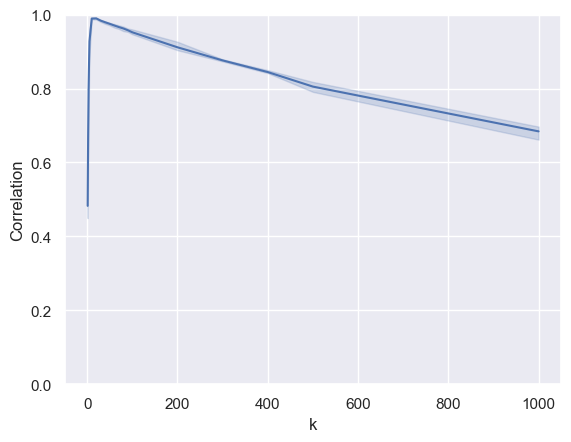

In [41]:
# use seaborn to plot collection_df over k 

import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="darkgrid")

# set y-axis to start from 0 
plt.ylim(0, 1)
sns.lineplot(x='k', y='Correlation', data=collection_df)
plt.show()


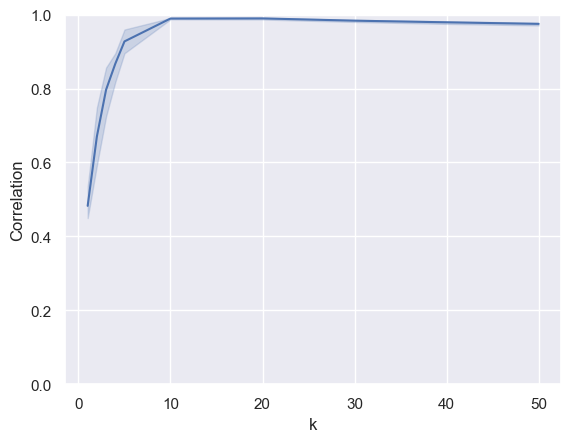

In [43]:
# plot k up to 50 as a close up 
sns.set_theme(style="darkgrid")

# set y-axis to start from 0
plt.ylim(0, 1)

sns.lineplot(x='k', y='Correlation', data=collection_df[collection_df['k'] <= 50])

plt.show()

## Increasing informative features

In [44]:
n_samples = 1000
n_features = 10000
n_informative = 100
random_state = 0
# import pipeline, scaler and f-regression, select k best 
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import f_regression, SelectKBest

import pandas as pd

# create a pipeline

iterations = 3
collection_df = pd.DataFrame(columns=['i', 'k', 'MSE', 'Correlation', 'p-value', 'y_test', 'y_pred'])
k_range_large = [1, 2, 3, 4, 5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 200, 300, 400, 500, 1000] 
k_range_small = [1, 2, 3, 4, 5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

selected_k_range = k_range_large
total_iterations = iterations * len(selected_k_range)

iter_count = 0 
for i in range(iterations):
    for k in selected_k_range:
        model = Pipeline([('scaler', StandardScaler()),
                        ('select', SelectKBest(f_regression, k=k)),
                        ('model', ElasticNet(max_iter=10000))])

        mse, corr, pval, y_test, y_pred = evaluate_make_regression(model, 
                                                                n_samples=n_samples, 
                                                                n_features=n_features, 
                                                                n_informative=n_informative, 
                                                                random_state=0+i)

        # use pd.concat to append a new row to the dataframe
        collection_df = pd.concat([collection_df, pd.DataFrame([[i, k, mse, corr, pval, y_test, y_pred]], columns=['i', 'k', 'MSE', 'Correlation', 'p-value', 'y_test', 'y_pred'])], ignore_index=True)

        # print progress
        print(f'{iter_count}/{total_iterations} - {model.__class__.__name__} n_samples={n_samples}, n_features={n_features}, n_informative={n_informative}, random_state={random_state}, k={k}')

        iter_count += 1






0/60 - Pipeline n_samples=1000, n_features=10000, n_informative=100, random_state=0, k=1
1/60 - Pipeline n_samples=1000, n_features=10000, n_informative=100, random_state=0, k=2
2/60 - Pipeline n_samples=1000, n_features=10000, n_informative=100, random_state=0, k=3
3/60 - Pipeline n_samples=1000, n_features=10000, n_informative=100, random_state=0, k=4
4/60 - Pipeline n_samples=1000, n_features=10000, n_informative=100, random_state=0, k=5
5/60 - Pipeline n_samples=1000, n_features=10000, n_informative=100, random_state=0, k=10
6/60 - Pipeline n_samples=1000, n_features=10000, n_informative=100, random_state=0, k=20
7/60 - Pipeline n_samples=1000, n_features=10000, n_informative=100, random_state=0, k=30
8/60 - Pipeline n_samples=1000, n_features=10000, n_informative=100, random_state=0, k=40
9/60 - Pipeline n_samples=1000, n_features=10000, n_informative=100, random_state=0, k=50
10/60 - Pipeline n_samples=1000, n_features=10000, n_informative=100, random_state=0, k=60
11/60 - Pipeli

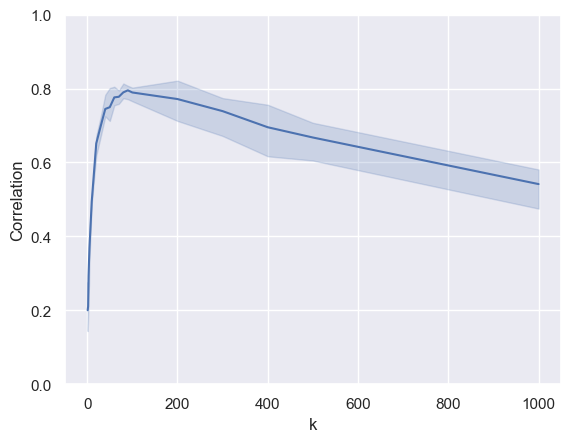

In [46]:
# use seaborn to plot collection_df over k 

import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="darkgrid")

# set y-axis to start from 0 
plt.ylim(0, 1)
sns.lineplot(x='k', y='Correlation', data=collection_df)
plt.show()


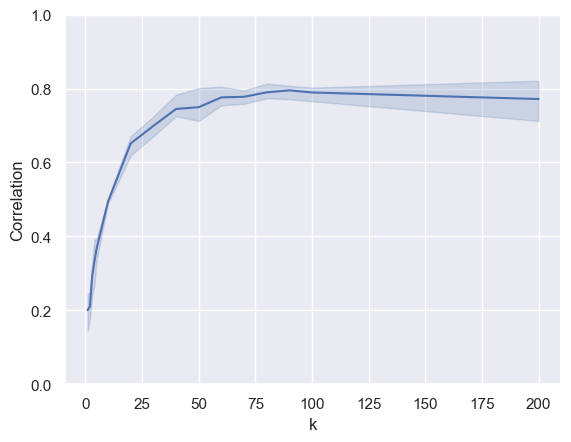

In [47]:
# plot k up to 50 as a close up 
sns.set_theme(style="darkgrid")

# set y-axis to start from 0
plt.ylim(0, 1)

sns.lineplot(x='k', y='Correlation', data=collection_df[collection_df['k'] <= 200])

plt.show()

## Reducing sample size

In [54]:
n_samples = 100
n_features = 10000
n_informative = 100
random_state = 0
# import pipeline, scaler and f-regression, select k best 
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import f_regression, SelectKBest

import pandas as pd

# create a pipeline

iterations = 3
collection_df = pd.DataFrame(columns=['i', 'k', 'MSE', 'Correlation', 'p-value', 'y_test', 'y_pred'])
k_range_large = [1, 2, 3, 4, 5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 200, 300, 400, 500, 1000] 
k_range_small = [1, 2, 3, 4, 5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

selected_k_range = k_range_large
total_iterations = iterations * len(selected_k_range)

iter_count = 0 
for i in range(iterations):
    for k in selected_k_range:
        model = Pipeline([('scaler', StandardScaler()),
                        ('select', SelectKBest(f_regression, k=k)),
                        ('model', ElasticNet(max_iter=10000))])

        mse, corr, pval, y_test, y_pred = evaluate_make_regression(model, 
                                                                n_samples=n_samples, 
                                                                n_features=n_features, 
                                                                n_informative=n_informative, 
                                                                random_state=0+i)

        # use pd.concat to append a new row to the dataframe
        collection_df = pd.concat([collection_df, pd.DataFrame([[i, k, mse, corr, pval, y_test, y_pred]], columns=['i', 'k', 'MSE', 'Correlation', 'p-value', 'y_test', 'y_pred'])], ignore_index=True)

        # print progress
        print(f'{iter_count}/{total_iterations} - {model.__class__.__name__} n_samples={n_samples}, n_features={n_features}, n_informative={n_informative}, random_state={random_state}, k={k}')

        iter_count += 1






0/60 - Pipeline n_samples=100, n_features=10000, n_informative=100, random_state=0, k=1
1/60 - Pipeline n_samples=100, n_features=10000, n_informative=100, random_state=0, k=2
2/60 - Pipeline n_samples=100, n_features=10000, n_informative=100, random_state=0, k=3
3/60 - Pipeline n_samples=100, n_features=10000, n_informative=100, random_state=0, k=4
4/60 - Pipeline n_samples=100, n_features=10000, n_informative=100, random_state=0, k=5
5/60 - Pipeline n_samples=100, n_features=10000, n_informative=100, random_state=0, k=10
6/60 - Pipeline n_samples=100, n_features=10000, n_informative=100, random_state=0, k=20
7/60 - Pipeline n_samples=100, n_features=10000, n_informative=100, random_state=0, k=30
8/60 - Pipeline n_samples=100, n_features=10000, n_informative=100, random_state=0, k=40
9/60 - Pipeline n_samples=100, n_features=10000, n_informative=100, random_state=0, k=50
10/60 - Pipeline n_samples=100, n_features=10000, n_informative=100, random_state=0, k=60
11/60 - Pipeline n_sample

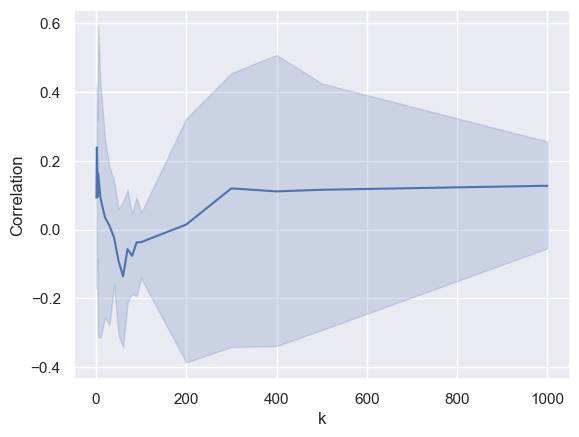

In [58]:
# use seaborn to plot collection_df over k 

import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="darkgrid")

# set y-axis to start from 0 
# plt.ylim(0, 1)
sns.lineplot(x='k', y='Correlation', data=collection_df)
plt.show()


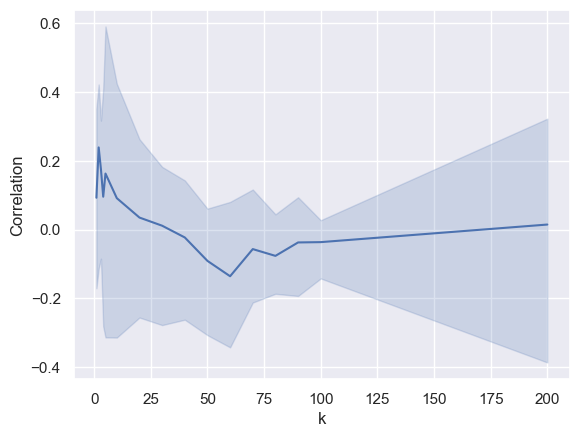

In [59]:
# plot k up to 50 as a close up 
sns.set_theme(style="darkgrid")

# set y-axis to start from 0
# plt.ylim(0, 1)

sns.lineplot(x='k', y='Correlation', data=collection_df[collection_df['k'] <= 200])

plt.show()

Failed fit!

## Using more powerful models

MSE = 1165.3036, Correlation = 0.9910, p-value = 0.0000


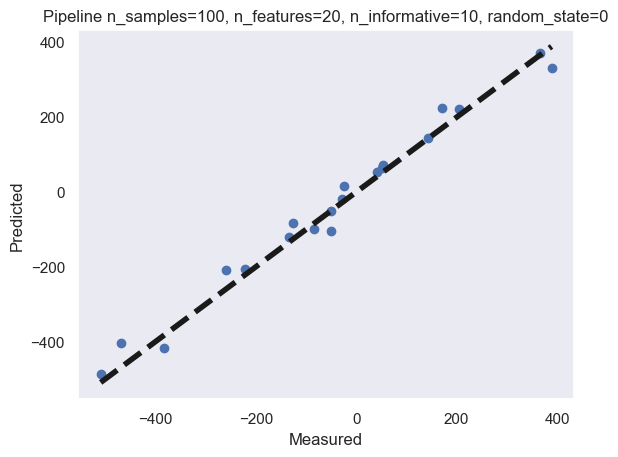

In [131]:
import dynmarker.FeatureSelection as fs 
from functools import partial

# import mutual information regression
from sklearn.feature_selection import mutual_info_regression


n_samples = 100
n_features = 20
n_informative = 10
random_state = 0
k = 10
mrmr_score_func = partial(fs.mrmr_select_fcq_sklearn, K=k)
model = Pipeline([('scaler', StandardScaler()),
                ('select', SelectKBest(f_regression, k=k)),
                ('model', LassoCV(max_iter=10000))])

mse, corr, pval, y_test, y_pred = evaluate_make_regression(model, 
                                                           n_samples=n_samples, 
                                                           n_features=n_features, 
                                                           n_informative=n_informative, 
                                                           random_state=15)

print(f'MSE = {mse:.4f}, Correlation = {corr:.4f}, p-value = {pval:.4f}')

plt.title(f'{model.__class__.__name__} n_samples={n_samples}, n_features={n_features}, n_informative={n_informative}, random_state={random_state}')
plot_make_regression(y_test, y_pred)

MSE = 238204.4990, Correlation = 0.5420, p-value = 0.0136


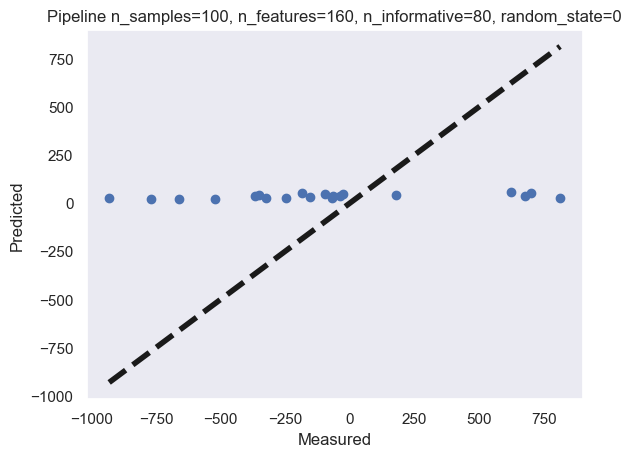

In [167]:
import dynmarker.FeatureSelection as fs 
from functools import partial

# import mutual information regression
from sklearn.feature_selection import mutual_info_regression


n_samples = 100
n_features = 160
n_informative = int(n_features/2)
random_state = 0
k = int(n_features/4)
mrmr_score_func = partial(fs.mrmr_select_fcq_sklearn, K=k)
model = Pipeline([('scaler', StandardScaler()),
                ('select', SelectKBest(mutual_info_regression, k=k)),
                ('model', LassoCV(max_iter=10000))])

mse, corr, pval, y_test, y_pred = evaluate_make_regression(model, 
                                                           n_samples=n_samples, 
                                                           n_features=n_features, 
                                                           n_informative=n_informative, 
                                                           random_state=15)

print(f'MSE = {mse:.4f}, Correlation = {corr:.4f}, p-value = {pval:.4f}')

plt.title(f'{model.__class__.__name__} n_samples={n_samples}, n_features={n_features}, n_informative={n_informative}, random_state={random_state}')
plot_make_regression(y_test, y_pred)

## Extract ground truth features from make_regression

In [192]:
n_samples = 100
n_features = 10000
n_informative = 50
random_state = 15
k = 50
model = Pipeline([('scaler', StandardScaler()),
                ('model', LassoCV(max_iter=10000))])

benchmark_regression_X, benchmark_regression_y = make_regression(n_samples=n_samples, 
                                                                n_features=n_features, 
                                                                n_informative=n_informative, 
                                                                random_state=random_state, 
                                                                shuffle=False)

# turn X and Y into dataframes
X = pd.DataFrame(benchmark_regression_X)
y = pd.Series(benchmark_regression_y)



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)

# select the first k features in X_train

X_train = X_train.iloc[:, :k]

model.fit(X_train, y_train)

y_pred = model.predict(X_test.iloc[:, :k])

# calculate the error

mse = mean_squared_error(y_test, y_pred)

# pearson correlation coefficient and p-value
corr, pval = pearsonr(y_test, y_pred)

print(f'MSE = {mse:.4f}, Correlation = {corr:.4f}, p-value = {pval:.4f}')

MSE = 48.8096, Correlation = 1.0000, p-value = 0.0000


# Conclusions

## Information is hard to extract when sample size is small

In [16]:
from sklearn.metrics import mean_squared_error
from scipy.stats import pearsonr

def ground_truth_evaluation(model, n_samples=1000, n_features=1000, n_informative=10, k_features=10, random_state=0, verbose=False):
    
    benchmark_regression_X, benchmark_regression_y = make_regression(n_samples=n_samples, 
                                                                n_features=n_features, 
                                                                n_informative=n_informative, 
                                                                random_state=random_state, 
                                                                shuffle=False)

    # turn X and Y into dataframes
    X = pd.DataFrame(benchmark_regression_X)
    y = pd.Series(benchmark_regression_y)

    k = k_features


    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)

    # select the first k features in X_train

    X_train = X_train.iloc[:, :k]

    model.fit(X_train, y_train)

    y_pred = model.predict(X_test.iloc[:, :k])

    # calculate the error

    mse = mean_squared_error(y_test, y_pred)

    # pearson correlation coefficient and p-value
    corr, pval = pearsonr(y_test, y_pred)

    if verbose:
        # print(f'MSE = {mse:.4f}, Correlation = {corr:.4f}, p-value = {pval:.4f}')
        # print the parameters and the model name, and the results
        print(f'{model.__class__.__name__} n={n_samples}, kt={n_features}, inf={n_informative}, MSE = {mse:.4f}, Correlation = {corr:.4f}, p-value = {pval:.4f}')

    return mse, corr, pval, y_test, y_pred


In [17]:
# import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LassoCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler


model = Pipeline([('scaler', StandardScaler()),
                ('model', LassoCV(max_iter=10000))])

mse, corr, pval, y_test, y_pred = ground_truth_evaluation(model, n_samples=100, n_features=10000, n_informative=10, k_features=10,random_state=0, verbose=True)

Pipeline n=100, k=10000, inf=10, MSE = 0.1499, Correlation = 1.0000, p-value = 0.0000


In [26]:
columns = ['i', 'sample_size', 'k', 'MSE', 'Correlation', 'p-value', 'y_test', 'y_pred']
collection_df = pd.DataFrame(columns=columns)
n_samples = [100, 1000, 10000]
n_features = 10000 
n_informative = [10,20,30,40,50,60,70,80,90,100,150,200,250,300,350,400,450,500,550,600,650,700,750,800,850,900,950,1000]
repeats = 3

for s in n_samples:
    for inf in n_informative:
        for i in range(repeats):

            mse, corr, pval, y_test, y_pred = ground_truth_evaluation(model, n_samples=s, n_features=n_features, n_informative=inf, k_features=inf,random_state=i, verbose=False)
            if corr == np.nan:
                print(f'WARNING: corr is nan at i={i}, inf={inf}')
                corr = 0
            if pval == np.nan:
                pval = 10
            collection_df = pd.concat([collection_df, pd.DataFrame([[i, s, inf, mse, corr, pval, y_test, y_pred]], columns=columns)], ignore_index=True)
collection_df.head()

c:\Github\ode-biomarker-project\dynamic-marker\lib\site-packages\scipy\stats\_stats_py.py:4427: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
c:\Github\ode-biomarker-project\dynamic-marker\lib\site-packages\scipy\stats\_stats_py.py:4427: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
c:\Github\ode-biomarker-project\dynamic-marker\lib\site-packages\scipy\stats\_stats_py.py:4427: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
c:\Github\ode-biomarker-project\dynamic-marker\lib\site-packages\scipy\stats\_stats_py.py:4464: NearConstantInputWarning: An input array is nearly constant; the computed correlation coefficient may be inaccurate.
  warnings.warn(stats.NearConstantInputWarning(msg))
c:\Github\ode-bio

,i,sample_size,k,MSE,Correlation,p-value,y_test,y_pred
0,0,100,10,0.149894,1.000000,2.775203e-58,26 -18.504495 86 -340.949110 2 -41.10...,"[-18.260134364270865, -340.1625782503299, -41...."
1,1,100,10,0.146253,0.999999,2.128420e-51,80 -84.754749 84 236.585585 33 -216.75...,"[-84.59017802472124, 236.42576726572236, -216...."
2,2,100,10,0.143752,0.999999,1.037421e-53,83 29.994055 30 -56.223466 56 -138.48...,"[29.726137694233728, -56.06235551821004, -138...."
3,0,100,20,0.447975,0.999999,2.951619e-54,26 250.141421 86 -282.017334 2 15.54...,"[250.24209733581904, -281.3885495405211, 15.71..."
4,1,100,20,0.242075,0.999999,6.630062e-53,80 -79.715380 84 328.309294 33 -165.87...,"[-79.77998828469308, 328.0893747698875, -165.7..."


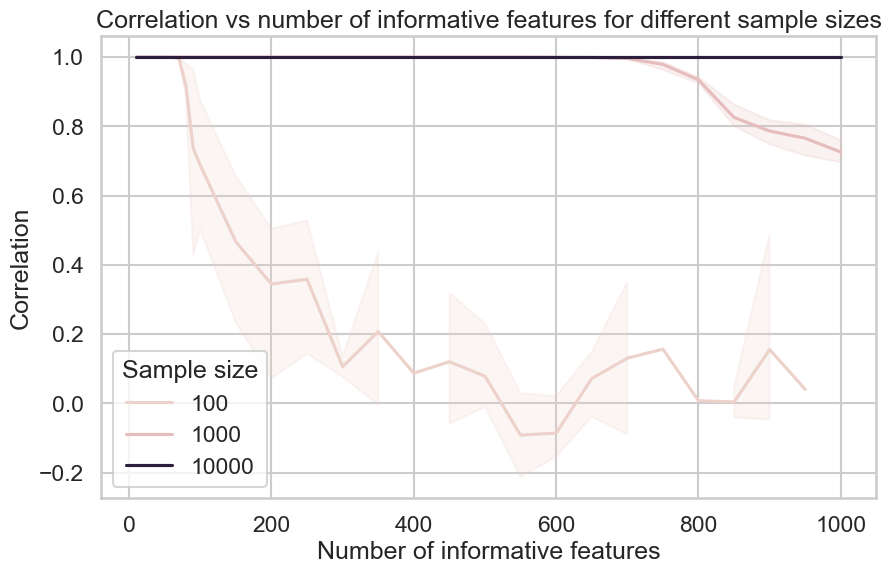

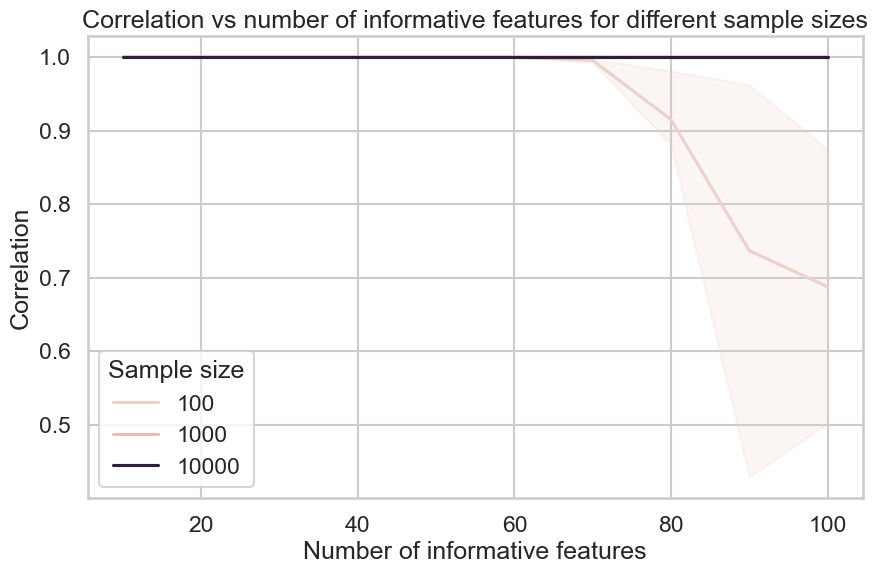

In [35]:
# using seaborn to plot the results, correlation vs number of informative features for different sample sizes

sns.set_style('whitegrid')
sns.set_palette('colorblind')

fig, ax = plt.subplots(1, 1, figsize=(10, 6))

sns.lineplot(x='k', y='Correlation', hue='sample_size', data=collection_df, ax=ax)
ax.set_title('Correlation vs number of informative features for different sample sizes')
ax.set_xlabel('Number of informative features')
ax.set_ylabel('Correlation')
ax.legend(title='Sample size')
plt.show()

# in the second plot, we restrict the number of informative features to 100

sns.set_style('whitegrid')
sns.set_palette('colorblind')

fig, ax = plt.subplots(1, 1, figsize=(10, 6))

sns.lineplot(x='k', y='Correlation', hue='sample_size', data=collection_df[collection_df['k']<=100], ax=ax)
ax.set_title('Correlation vs number of informative features for different sample sizes')
ax.set_xlabel('Number of informative features')
ax.set_ylabel('Correlation')
ax.legend(title='Sample size')
plt.show()

In [37]:
# save the results to a pickle file

collection_df.to_pickle('data/processed-results/ground_truth_results.pkl')

In [4]:
# import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LassoCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
# import feature selection 
from sklearn.feature_selection import SelectKBest, f_regression


model = Pipeline([('scaler', StandardScaler()),
                ('model', LassoCV(max_iter=10000))])

mse, corr, pval, y_test, y_pred = evaluate_make_regression(model, n_samples=100, n_features=10000, n_informative=10,random_state=0)

In [5]:
columns = ['i', 'sample_size', 'k', 'inf', 'MSE', 'Correlation', 'p-value', 'y_test', 'y_pred']
collection_df = pd.DataFrame(columns=columns)
n_samples = [100, 1000, 10000]
n_features = 10000
n_informative = [10,100,1000]
k_range_small = [10,50,100]
repeats = 10



count = 0
total_iterations = len(n_samples)*len(n_informative)*len(k_range_small)*repeats
for s in n_samples:
    for inf in n_informative:
        for k in k_range_small:
            for i in range(repeats):
                model = Pipeline([('scaler', StandardScaler()),
                                  ('feature_selection', SelectKBest(f_regression, k=k)),
                                ('model', LassoCV(max_iter=10000))])
                mse, corr, pval, y_test, y_pred = evaluate_make_regression(model, n_samples=s, n_features=n_features, n_informative=inf,random_state=i)
                if corr == np.nan:
                    print(f'WARNING: corr is nan at k={k}, inf={inf}')
                    corr = 0
                if pval == np.nan:
                    pval = 10
                collection_df = pd.concat([collection_df, pd.DataFrame([[i, s, k, inf, mse, corr, pval, y_test, y_pred]], columns=columns)], ignore_index=True)
                count += 1
                print(f'{count}/{total_iterations} iterations completed, {count/total_iterations*100:.2f}%. Current k={k}, inf={inf}, s={s}, i={i}')

collection_df.head()

1/270 iterations completed, 0.37%. Current k=10, inf=10, s=100, i=0
2/270 iterations completed, 0.74%. Current k=10, inf=10, s=100, i=1
3/270 iterations completed, 1.11%. Current k=10, inf=10, s=100, i=2
4/270 iterations completed, 1.48%. Current k=10, inf=10, s=100, i=3
5/270 iterations completed, 1.85%. Current k=10, inf=10, s=100, i=4
6/270 iterations completed, 2.22%. Current k=10, inf=10, s=100, i=5
7/270 iterations completed, 2.59%. Current k=10, inf=10, s=100, i=6
8/270 iterations completed, 2.96%. Current k=10, inf=10, s=100, i=7
9/270 iterations completed, 3.33%. Current k=10, inf=10, s=100, i=8
10/270 iterations completed, 3.70%. Current k=10, inf=10, s=100, i=9
11/270 iterations completed, 4.07%. Current k=50, inf=10, s=100, i=0
12/270 iterations completed, 4.44%. Current k=50, inf=10, s=100, i=1
13/270 iterations completed, 4.81%. Current k=50, inf=10, s=100, i=2
14/270 iterations completed, 5.19%. Current k=50, inf=10, s=100, i=3
15/270 iterations completed, 5.56%. Current

,i,sample_size,k,inf,MSE,Correlation,p-value,y_test,y_pred
0,0,100,10,10,37357.657150,0.455438,4.359782e-02,26 27.221927 86 -41.101660 2 -100.37...,"[12.423408396494626, 61.08364705108735, -164.0..."
1,1,100,10,10,19026.806273,0.781900,4.656282e-05,80 -205.494227 84 -15.009789 33 -12.70...,"[-76.35696722143754, 50.37543841848698, -22.41..."
2,2,100,10,10,6913.403726,0.887872,1.759665e-07,83 -75.631349 30 136.302553 56 29.99...,"[-82.0039769929108, 128.54686538948175, -4.294..."
3,3,100,10,10,9812.273540,0.862305,1.014164e-06,93 149.721947 67 43.777763 6 -203.70...,"[-51.197080767290686, 26.622985183101044, -235..."
4,4,100,10,10,10083.087082,0.902874,5.111505e-08,20 -18.181037 10 160.858012 96 -300.79...,"[24.758265366532363, 62.02065592337365, -123.0..."


In [ ]:
# save df to pickle

collection_df.to_pickle('data/processed-results/f_reg_selection_results_make_regression.pkl')

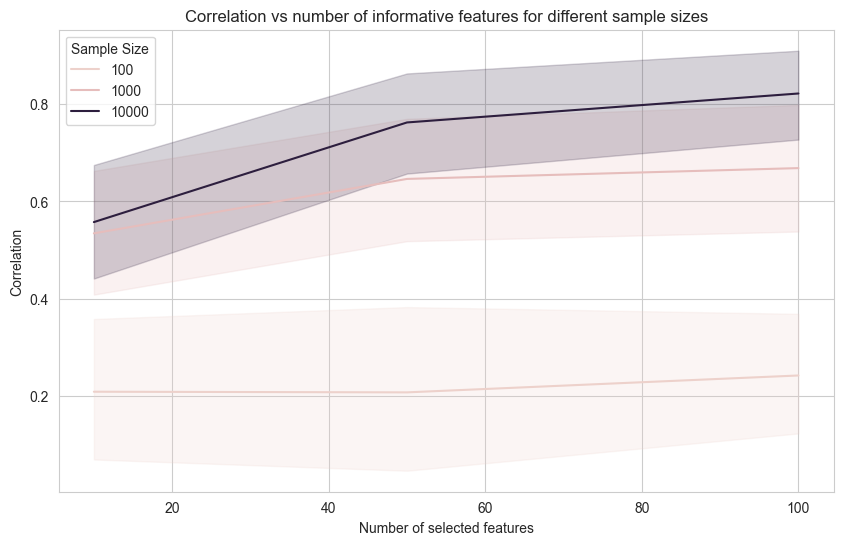

In [6]:
# using seaborn to plot the results, correlation vs number of informative features for different sample sizes for different k values

sns.set_style('whitegrid')
sns.set_palette('colorblind')

fig, ax = plt.subplots(1, 1, figsize=(10, 6))

# use box plot to show the distribution of correlation for different k values, for different sample sizes
sns.lineplot(x='k', y='Correlation', hue='sample_size', data=collection_df, ax=ax)

ax.set_title('Correlation vs number of informative features for different sample sizes')
ax.set_xlabel('Number of selected features')
ax.set_ylabel('Correlation')
ax.legend(title='Sample Size')
plt.show()



## Conclusion 2

In [ ]:
# import numpy as np
# import pandas as pd

# collection_df = pd.DataFrame(columns=['model_name', 'sample_size', 'feature_size', 'informative_ratio','mse', 'corr', 'pval', 'ypred', 'ytest'])
# # n_samples = 1000
# # n_features = 1000
# # n_informative = 10
# # random_state = 0
# # model = ElasticNet()

# # generate ranges of samples, features, informative features

# sample_size = [50, 100, 500, 1000, 5000, 10000]
# feature_size = [10,20,40,80,160,320,640,1280,2560,5120,10240,20480]
# informative_ratio = np.linspace(0.01, 1, 20)
# model_list = [ElasticNet(max_iter=100000), LinearRegression()]

# # perform a simple train test split fitting 

# from sklearn.datasets import make_regression
# from sklearn.metrics import mean_squared_error
# from scipy.stats import pearsonr
# import pandas as pd
# from sklearn.model_selection import train_test_split

# def benchmark_regression(model, i, n_samples, n_features, informative_ratio, random_state=0):

#     df = pd.DataFrame(columns=['iteration', 'model_name', 'sample_size', 'feature_size', 'informative_ratio','mse', 'corr', 'pval', 'ypred', 'ytest'])

#     n_informative = int(n_features * informative_ratio)
#     if n_informative == 0:
#         n_informative = 1

#     benchmark_regression_X, benchmark_regression_y = make_regression(n_samples=n_samples, 
#                                                                      n_features=n_features, 
#                                                                      n_informative=n_informative, 
#                                                                      random_state=random_state+i)

#     # turn X and Y into dataframes
#     X = pd.DataFrame(benchmark_regression_X)
#     y = pd.Series(benchmark_regression_y)

#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)

#     model.fit(X_train, y_train)

#     y_pred = model.predict(X_test)

#     # calculate the error

#     mse = mean_squared_error(y_test, y_pred)

#     # pearson correlation coefficient and p-value
#     corr, pval = pearsonr(y_test, y_pred)

#     df = pd.concat([df, pd.DataFrame({'iteration': i,
#                     'model_name': model.__class__.__name__,
#                     'sample_size': n_samples,
#                     'feature_size': n_features,
#                     'informative_ratio': informative_ratio,
#                     'mse': mse,
#                     'corr': corr,
#                     'pval': pval,
#                     'ypred': [y_pred],
#                     'ytest': [y_test]})], ignore_index=True)
    

#     return df


# from sklearn.base import clone 
# from joblib import Parallel, delayed, cpu_count

# for model in model_list:
#     for i in range(3):
#         for n_samples in sample_size:
#             for n_features in feature_size:
#                 for ir in informative_ratio:
#                     eval_df = benchmark_regression(clone(model), i, n_samples, n_features, ir)
#                     print(f'---Finished {model.__class__.__name__} {i} {n_samples} {n_features} {ir}')
#                     collection_df = pd.concat([collection_df, eval_df], ignore_index=True)

# collection_df

# # for model in model_list:
# #     eval_list = Parallel(n_jobs=cpu_count()/2)(delayed(benchmark_regression)(clone(model), i, n_samples, n_features, ir) for i in range(3) for n_samples in sample_size for n_features in feature_size for ir in informative_ratio)
# #     print(f'---Finished {model.__class__.__name__}')

# # collection_df = pd.concat([collection_df, pd.concat(eval_list, ignore_index=True)], ignore_index=True)